In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from IPython.display import display
from IPython.display import Image as IPImage
import io
from PIL import Image
from typing import Callable
import matplotlib.pyplot as plt
from time import time


# Funciones

In [9]:
# Función de Rosenbrock
def rosenbrock(x, a=1, b=100):
    """
    Calcula el valor de la función de Rosenbrock.
    x: vector de entrada (numpy array)
    a, b: parámetros de la función
    """
    return (sum(b * (x[1:] - x[:-1]**2)**2 + (x[:-1] - a)**2))

# Función de Rastrigin
def rastrigin(x):
    """
    Calcula el valor de la función de Rastrigin.
    x: vector de entrada (numpy array)
    """
    d = len(x)
    return 10 * d + sum(x**2 - 10 * np.cos(2 * np.pi * x))

# Función de Schwefel
def schwefel(x):
    """
    Calcula el valor de la función de Schwefel.
    x: vector de entrada (numpy array)
    """
    d = len(x)
    return 418.9829 * d - sum(x * np.sin(np.sqrt(np.abs(x))))

# Función de Griewank
def griewank(x):
    """
    Calcula el valor de la función de Griewank.
    x: numpy array (vector de entrada o np.array([X1, X2]))
    """
    x = np.asarray(x)
    d = x.shape[0]  # Asume que x tiene forma (d, ...)
    indices = np.sqrt(np.arange(1, d + 1))[:, None, None]  # Ajusta el índice para broadcasting
    term1 = np.sum(x**2, axis=0) / 4000
    term2 = np.prod(np.cos(x / indices), axis=0)
    return 1 + term1 - term2

def griewank(x):
    """
    Calcula el valor de la función Griewank.
    x: numpy array unidimensional (1D) o un array con forma (d, n1, n2) para evaluaciones vectorizadas.
    
    Retorna:
    - Un valor escalar si `x` es 1D.
    - Una matriz (n1, n2) si `x` tiene forma (d, n1, n2).
    """
    x = np.asarray(x)

    if x.ndim == 1:
        # Caso 1D: calcular para un solo vector
        d = len(x)
        sum_term = np.sum(x**2) / 4000
        product_term = np.prod(np.cos(x / np.sqrt(np.arange(1, d + 1))))
        return 1 + sum_term - product_term

    elif x.ndim == 3:
        # Caso ND: calcular para una cuadrícula (vectorizado)
        d = x.shape[0]
        i_indices = np.arange(1, d + 1).reshape(-1, 1, 1)
        sum_term = np.sum(x**2, axis=0) / 4000
        product_term = np.prod(np.cos(x / np.sqrt(i_indices)), axis=0)
        return 1 + sum_term - product_term

    else:
        raise ValueError("La entrada debe ser un array 1D o un array con forma (d, n1, n2).")


# Función Goldstein-Price
def goldstein_price(x):
    """
    Calcula el valor de la función Goldstein-Price.
    x1, x2: coordenadas en 2D
    """
    x1=x[0]
    x2=x[1]
    term1 = (1 + (x1 + x2 + 1)**2 * (19 - 14 * x1 + 3 * x1**2 - 14 * x2 + 6 * x1 * x2 + 3 * x2**2))
    term2 = (30 + (2 * x1 - 3 * x2)**2 * (18 - 32 * x1 + 12 * x1**2 + 48 * x2 - 36 * x1 * x2 + 27 * x2**2))
    return term1 * term2

# Función de las seis jorobas de camello
def camel_six_humps(x):
    """
    Calcula el valor de la función de las seis jorobas de camello.
    x1, x2: coordenadas en 2D
    """
    x1 = x[0]
    x2 = x[1]
    term1 = (4 - 2.1 * x1**2 + x1**4 / 3) * x1**2
    term2 = x1 * x2
    term3 = (-4 + 4 * x2**2) * x2**2
    return term1 + term2 + term3

# Función Graficadora

In [10]:
def plot_function(f, x1_range, x2_range, title="Function Plot", x1_point=None, x2_point=None, elev=30, azim=45 ):
    x1 = np.linspace(x1_range[0], x1_range[1], 400)
    x2 = np.linspace(x2_range[0], x2_range[1], 400)
    X1, X2 = np.meshgrid(x1, x2)
    Z = f(np.array([X1,X2]))

    fig = plt.figure(figsize=(14, 6))

    # 3D plot
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.plot_surface(X1, X2, Z)
    ax1.set_title(f'3D Plot of {title}')
    ax1.set_xlabel('X1')
    ax1.set_ylabel('X2')
    ax1.set_zlabel('Z')

    ax1.view_init(elev=elev, azim=azim)

    if x1_point is not None and x2_point is not None:
        z_point = f(np.array([x1_point, x2_point])[:, None, None])[0, 0]

        ax1.plot([x1_point], [x2_point], [z_point], color='r', marker='o', markersize=5, linewidth=0, label="Mínimo global", zorder=5)
        ax1.legend()

    # Contour plot
    ax2 = fig.add_subplot(122)
    contour = ax2.contour(X1, X2, Z, levels = 10)
    ax2.set_title(f'Contour Plot of {title}')
    ax2.set_xlabel('X1')
    ax2.set_ylabel('X2')
    fig.colorbar(contour, ax=ax2)

    if x1_point is not None and x2_point is not None:
        ax2.plot([x1_point], [x2_point], color='r', marker='o', markersize=5, linewidth=0, label="Mínimo global", zorder=5)
        ax2.legend()

    plt.show()


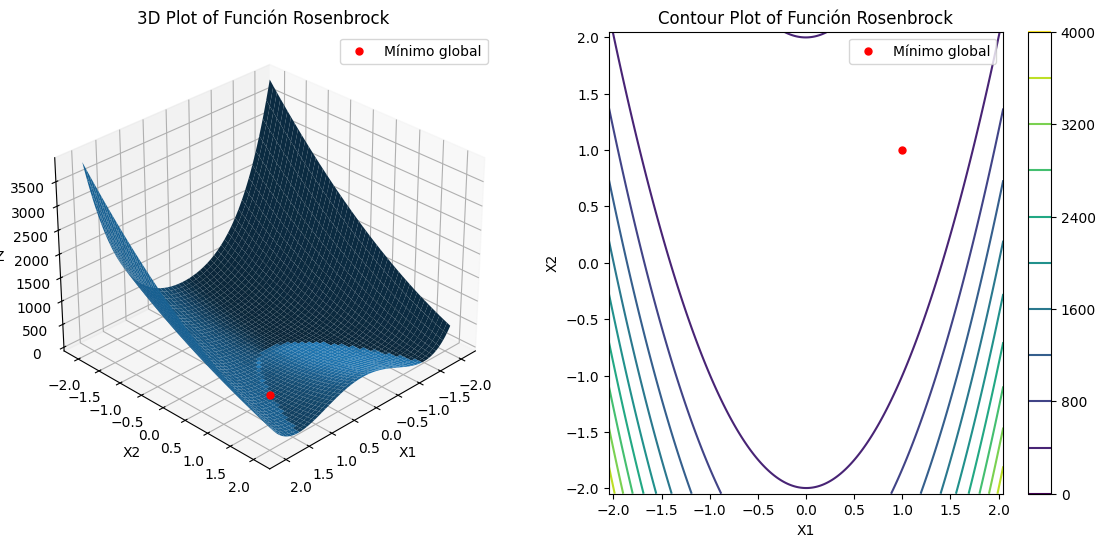

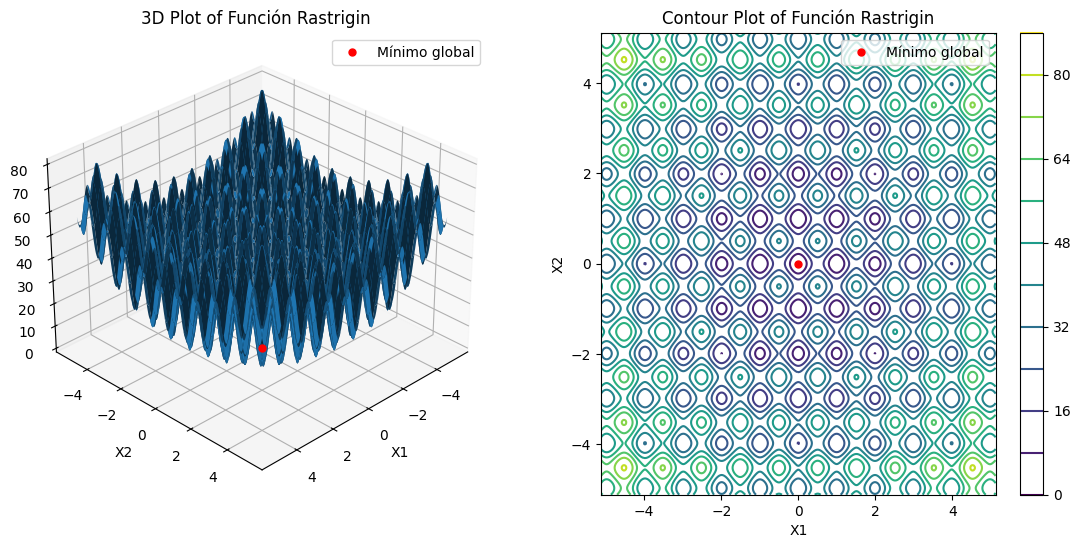

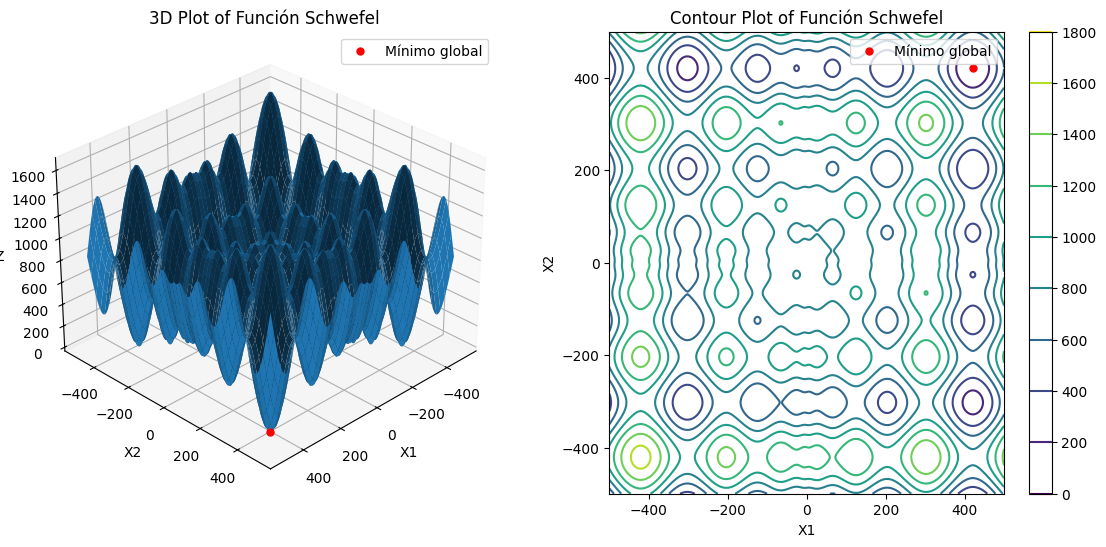

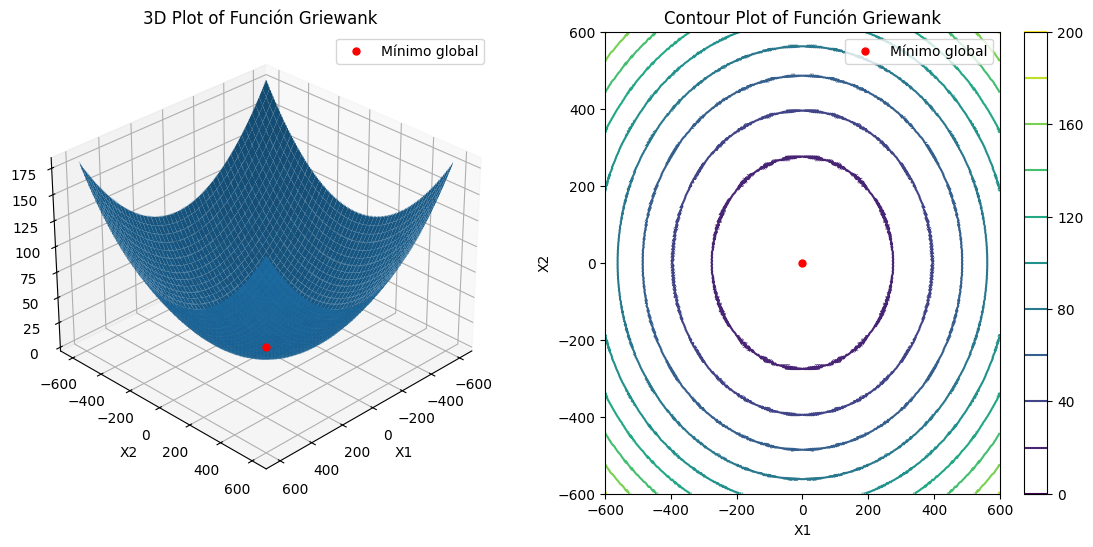

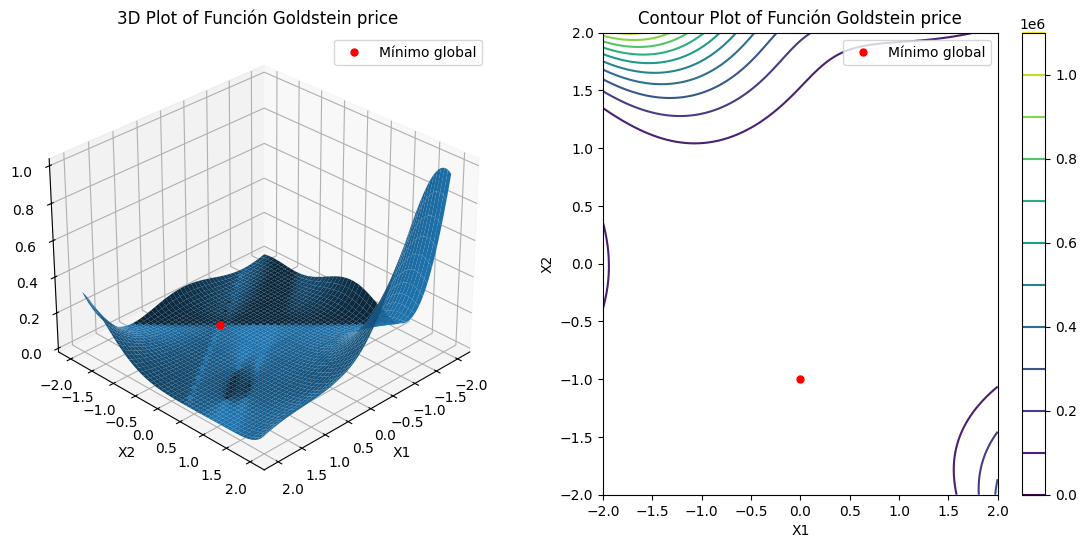

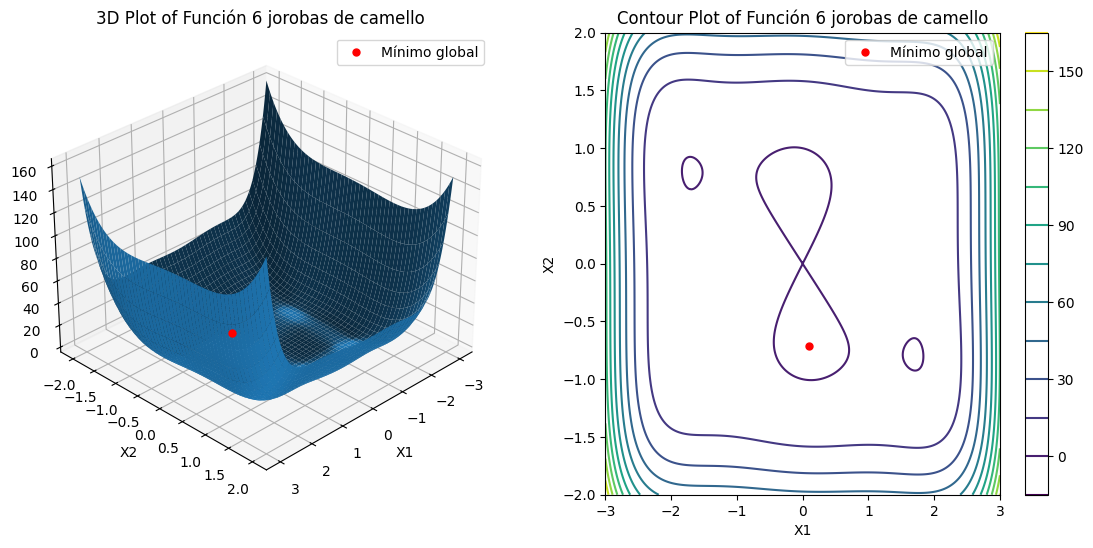

In [11]:
plot_function(rosenbrock, x1_range=(-2.048, 2.048), x2_range=(-2.048, 2.048), title="Función Rosenbrock", x1_point=1, x2_point=1)
plot_function(rastrigin, x1_range=(-5.12, 5.12), x2_range=(-5.12, 5.12), title="Función Rastrigin", x1_point=0, x2_point=0)
plot_function(schwefel, x1_range=(-500, 500), x2_range=(-500, 500), title="Función Schwefel", x1_point=420.9687, x2_point=420.9687)
plot_function(griewank, x1_range=(-600, 600), x2_range=(-600, 600), title="Función Griewank", x1_point=0, x2_point=0)
plot_function(goldstein_price, x1_range=(-2, 2), x2_range=(-2, 2), title="Función Goldstein price", x1_point=0, x2_point=-1)
plot_function(camel_six_humps, x1_range=(-3, 3), x2_range=(-2, 2), title="Función 6 jorobas de camello", x1_point=0.0898, x2_point=-0.7126)

# Función gif

In [12]:
def create_3d_animation(func, dataframe, x1_range, x2_range, output_filename='animation.gif', elev=30, azim=45 ):
    """
    Creates a 3D animated plot of a function and a trajectory given by points in a DataFrame.

    Parameters:
        func (callable): A function with parameters x1, x2.
        dataframe (pd.DataFrame): A DataFrame with columns ['x1', 'x2', 'f(x1,x2)'] representing points in the plane.
        output_filename (str): The name of the output GIF file.
    """
    # Extract x1, x2, and f(x1, x2) from the DataFrame
    x1_vals = dataframe['x1']
    x2_vals = dataframe['x2']
    z_vals = dataframe['f(x1,x2)']

    # Set up the 3D plot
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Define the function surface
    x1 = np.linspace(x1_range[0], x1_range[1], 400)
    x2 = np.linspace(x2_range[0], x2_range[1], 400)

    x1, x2 = np.meshgrid(x1, x2)
    z = func(np.array([x1,x2]))

    # Plot the surface with reduced opacity
    ax.plot_surface(x1, x2, z, alpha=0.9, edgecolor='none')
    ax.view_init(elev=elev, azim=azim)


    # Initialize the trajectory line
    line, = ax.plot([], [], [], color='r', marker='o', markersize=8, linewidth=2, label="Trajectoria", zorder=5)
    ax.legend()

    # Set axis labels
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('f(x1, x2)')

    # Animation function
    def update(frame):
        line.set_data(x1_vals[:frame + 1], x2_vals[:frame + 1])
        line.set_3d_properties(z_vals[:frame + 1])
        return line,

    # Create animation
    ani = FuncAnimation(fig, update, frames=len(dataframe), interval=500, blit=True)

    # Save the animation as a GIF
    ani.save(output_filename, writer='pillow')
    plt.close(fig)
    print(f"Animation saved as {output_filename}")


# Guardar gif

In [13]:
# Example application
def example_function(x1, x2):
    return np.sin(np.sqrt(x1**2 + x2**2))

# Create example DataFrame
example_df = pd.DataFrame({
    'x1': [-1, 0, 1, 2, 2,-1],
    'x2': [0, 1, 1.5, 2, 2.5,1],
    'f(x1,x2)': [rosenbrock(np.array([x1,x2])) for x1, x2 in zip([-1, 0, 1, 2, 2,-1], [0, 1, 1.5, 2, 2.5,1])]
})

# Generate animation

create_3d_animation(rosenbrock, example_df, x1_range=(-2.048, 2.048), x2_range=(-2.048, 2.048),  output_filename='rosenbrock.gif')
create_3d_animation(rastrigin, example_df, x1_range=(-5.12, 5.12), x2_range=(-5.12, 5.12),  output_filename='rastrigin.gif')
create_3d_animation(schwefel, example_df, x1_range=(-500, 500), x2_range=(-500, 500),  output_filename='schwefel.gif')
create_3d_animation(griewank, example_df, x1_range=(-600, 600), x2_range=(-600, 600),  output_filename='griewank.gif')
create_3d_animation(goldstein_price, example_df, x1_range=(-2, 2), x2_range=(-2, 2),  output_filename='goldstein_price.gif')
create_3d_animation(camel_six_humps, example_df, x1_range=(-3, 3), x2_range=(-2, 2),  output_filename='camel_six_humps.gif')

Animation saved as rosenbrock.gif
Animation saved as rastrigin.gif
Animation saved as schwefel.gif
Animation saved as griewank.gif
Animation saved as goldstein_price.gif
Animation saved as camel_six_humps.gif


# Gradiente descendente

In [14]:
def partial_derivative(x0, func, i, h, *args):
  e = np.zeros(len(x0))
  e[i] = 1
  return (func(x0+h*e, *args) - func(x0-h*e, *args))/(2*h)

In [15]:
def numerical_gradient(x0, func, h, *args):
  gradient = np.zeros(len(x0))
  for i in range(len(x0)):
    gradient[i] = partial_derivative(x0, func, i, h, *args)
  return gradient

In [16]:

def gradient_descent_num_dev_mult(x0, eta, func, h, max_iter, *args):
    """
    Perform gradient descent with numerical derivatives for a multi-dimensional function.

    Parameters:
        x0 (array-like): Initial guess for the variables.
        eta (float): Learning rate.
        func (callable): Function to minimize.
        h (float): Step size for numerical gradient calculation.
        max_iter (int): Maximum number of iterations.
        *args: Additional arguments for the function.

    Returns:
        x_new (array-like): Final point after gradient descent.
        result_df (pd.DataFrame): DataFrame with columns ['x1', 'x2', 'f(x1,x2)']
                                  containing the trajectory of points.
    """
    x_old = np.array(x0)
    x_hist = []  # List to store the history of x and f(x)

    for i in range(max_iter):
        # Calculate the gradient numerically
        gradient = numerical_gradient(x_old, func, h, *args)

        # Update x based on gradient descent rule
        x_new = x_old - eta * gradient

        # Append current x and function value to history
        x_hist.append([x_old[0], x_old[1], func(x_old, *args)])

        # Update x_old
        x_old = x_new

    # Add the final position and function value
    x_hist.append([x_new[0], x_new[1], func(x_new, *args)])

    # Convert history to a pandas DataFrame
    result_df = pd.DataFrame(x_hist, columns=['x1', 'x2', 'f(x1,x2)'])

    return result_df


In [17]:
rosenbrock_opt_grad=gradient_descent_num_dev_mult(x0 = np.array([-1.5,-1.7]), eta = 0.001, func = rosenbrock, h = 0.000001, max_iter = 30)
rastrigin_opt_grad=gradient_descent_num_dev_mult(x0 = np.array([-0.46,0.46]), eta = 0.005, func = rastrigin, h = 0.000001, max_iter = 30)  
schwefel_opt_grad=gradient_descent_num_dev_mult(x0 = np.array([310,310]), eta =0.8, func = schwefel, h = 0.000001, max_iter = 30)
griewank_opt_grad=gradient_descent_num_dev_mult(x0 = np.array([-500,500]), eta = 70, func = griewank, h = 0.000001, max_iter = 33)
goldstein_price_opt_grad=gradient_descent_num_dev_mult(x0 = np.array([0.5,-1.5]), eta = 0.00005, func = goldstein_price, h = 0.000001, max_iter = 50)
camel_six_humps_opt_grad=gradient_descent_num_dev_mult(x0 = np.array([-1,-1]), eta = 0.015, func = camel_six_humps, h = 0.000001, max_iter = 33)

In [18]:
create_3d_animation(rosenbrock, rosenbrock_opt_grad, x1_range=(-2.048, 2.048), x2_range=(-2.048, 2.048),  output_filename='rosenbrock.gif')
create_3d_animation(rastrigin, rastrigin_opt_grad, x1_range=(-5.12, 5.12), x2_range=(-5.12, 5.12),  output_filename='rastrigin.gif')
create_3d_animation(schwefel, schwefel_opt_grad, x1_range=(-500, 500), x2_range=(-500, 500),  output_filename='schwefel.gif')
create_3d_animation(griewank, griewank_opt_grad, x1_range=(-600, 600), x2_range=(-600, 600),  output_filename='griewank.gif')
create_3d_animation(goldstein_price, goldstein_price_opt_grad, x1_range=(-2, 2), x2_range=(-2, 2),  output_filename='goldstein_price.gif')
create_3d_animation(camel_six_humps, camel_six_humps_opt_grad, x1_range=(-2, 2), x2_range=(-1, 1),  output_filename='camel_six_humps.gif', elev=30, azim=75 )

Animation saved as rosenbrock.gif
Animation saved as rastrigin.gif
Animation saved as schwefel.gif
Animation saved as griewank.gif
Animation saved as goldstein_price.gif
Animation saved as camel_six_humps.gif


# Algoritmos evolutivos (Algoritmo genético)

Un algoritmo genético (GA) es un método heurístico de optimización inspirado en los principios de la **selección natural** y la **evolución biológica**, propuesto inicialmente por John Holland en los años 70. Este enfoque busca soluciones óptimas en un espacio de búsqueda utilizando una población de candidatos.

---

## 1. Concepto General

El algoritmo genético simula el proceso evolutivo a través de las siguientes etapas:
- **Selección**: Elegir individuos con mayor "fitness".
- **Cruce**: Combinar soluciones para generar descendencia.
- **Mutación**: Introducir variación genética.

Matemáticamente, en un problema de minimización, el objetivo es encontrar:

$$ x^* = \arg\min_{x \in \mathbb{R}^n} f(x) $$

donde:
- $x$ representa un individuo en el espacio de búsqueda.
- $f(x)$  es la función objetivo que evalúa la calidad de  $x$.

---

## 2. Representación del Problema

Cada solución candidata se representa como un **individuo**, que puede ser un vector real o un cromosoma binario:

$$x = (x_1, x_2, \ldots, x_n) \in \mathbb{R}^n$$

### Función Objetivo
La función objetivo mide qué tan buena es una solución:

$$\text{Fitness}(x) = f(x)$$

Para problemas de **minimización**, menor $f(x)$ implica mejor fitness.

---

## 3. Etapas del Algoritmo Genético

### 3.1 Inicialización de la Población
Se genera una población inicial de $P$  individuos de forma aleatoria dentro de un intervalo $[a, b]$ :

$$x_{ij} \sim \text{U}(a, b), \quad \forall i \in \{1, 2, \ldots, P\}, \; j \in \{1, 2, \ldots, n\}$$
donde:
- $x_{ij}$ es la $j-ésima$ coordenada del  $i-ésimo$ individuo.

---

### 3.2 Evaluación del Fitness
Cada individuo de la población es evaluado usando la función objetivo:

$\text{Fitness}_i = f(x_i)$

---

### 3.3 Selección
Se seleccionan individuos para reproducirse basándose en su fitness. Métodos comunes:

#### Torneo
1. Seleccionar $k$ individuos al azar.
2. Elegir al mejor de ellos:

$$\text{Individuo seleccionado} = \arg\min_{j \in S} \text{Fitness}_j, \; S \subseteq \{1, \ldots, P\}, \; |S| = k$$

#### Ruleta
Cada individuo recibe una probabilidad proporcional a su fitness inverso:

$$P(i) = \frac{1 / \text{Fitness}_i}{\sum_{j=1}^P (1 / \text{Fitness}_j)}$$

---

### 3.4 Cruce (Recombinación)
Dos individuos (padres) se combinan para generar descendencia. Un método común es **punto de corte único**:
1. Elegir un punto de cruce aleatorio $k$.
2. Generar descendencia:

$$\text{Hijo 1} = (\text{Padre}_1[:k], \text{Padre}_2[k:])$$

$$\text{Hijo 2} = (\text{Padre}_2[:k], \text{Padre}_1[k:])$$

La probabilidad de realizar un cruce está determinada por $p_c$ (tasa de cruce).

---

### 3.5 Mutación
Introduce variación genética al modificar aleatoriamente uno o más genes en un cromosoma con probabilidad $p_m$:

$$x_{ij} = x_{ij} + \Delta, \quad \Delta \sim \text{U}(-\delta, \delta)$$

donde:
- $\Delta$ es una perturbación aleatoria.
- $x_{ij}$ se restringe a los límites del problema.

---

### 3.6 Evaluación y Sustitución
1. Evaluar la nueva población.
2. Los mejores individuos pueden ser retenidos usando **elitismo**.

---

## 4. Matemáticas de Convergencia

Los algoritmos genéticos convergen hacia una solución aproximada, pero no garantizan el óptimo global. Se balancean dos objetivos:
- **Exploración**: Descubrir nuevas regiones del espacio de búsqueda.
- **Explotación**: Mejorar soluciones existentes.

### Teorema del Esquema
La evolución de un esquema $H$ (conjunto de soluciones similares) en la población está modelada como:

$$m(H, t+1) \geq m(H, t) \left( 1 - \frac{\delta(H)}{l-1} \right) p_c + (1 - p_c) p_m$$

donde:
- $m(H, t)$: Número de individuos del esquema $H$ en la generación $t$.
- $\delta(H)$: Distancia máxima entre genes de  $H$ .
- $l$: Longitud del cromosoma.
- $p_c$: Tasa de cruce.
- $p_m$: Tasa de mutación.

---

## 6. Ventajas y Desventajas

### Ventajas:
- No requiere derivadas ni condiciones específicas en $ f(x)$.
- Es efectivo en espacios de búsqueda multimodales o no convexos.
- Adaptable a diversos problemas.

### Desventajas:
- Puede ser computacionalmente costoso.
- No garantiza convergencia al óptimo global.
- Requiere ajuste cuidadoso de parámetros.
---



In [19]:
# Inicializar población
def initialize_population(size, dim, bounds):
    return np.random.uniform(bounds[0], bounds[1], (size, dim))

# Evaluar fitness
def evaluate_fitness(population,fitness_function):
    return np.array([fitness_function(ind) for ind in population])

# Selección por torneo
def tournament_selection(population, fitness, k=3):
    selected = []
    for _ in range(len(population)):
        candidates = np.random.choice(range(len(population)), k, replace=False)
        winner = candidates[np.argmin(fitness[candidates])]
        selected.append(population[winner])
    return np.array(selected)

# Cruce
def crossover(parent1, parent2,crossover_rate):
    if np.random.rand() < crossover_rate:
        point = np.random.randint(1, len(parent1))
        child = np.concatenate([parent1[:point], parent2[point:]])
        return child
    return parent1 if np.random.rand() < 0.5 else parent2

# Mutación
def mutate(individual, bounds, mutation_rate, delta):
    for i in range(len(individual)):
        if np.random.rand() < mutation_rate:
            individual[i] += np.random.uniform(-delta, delta)
            individual[i] = np.clip(individual[i], bounds[0], bounds[1])
    return individual


# Guardar la trayectoria
def genetic_algorithm(fitness_function, population_size, generations, mutation_rate, crossover_rate, dim, bounds, delta):
    population = initialize_population(population_size, dim, bounds)
    best_individual = None
    trajectory = []
    populations = []

    for generation in range(generations):
        populations.append(population.copy())
        fitness = evaluate_fitness(population, fitness_function)
        
        if best_individual is None or np.min(fitness) < fitness_function(best_individual):
            best_individual = population[np.argmin(fitness)]
        
        # Guardar la mejor solución de esta generación
        trajectory.append((*best_individual, fitness_function(best_individual)))
        
        # Selección
        selected_population = tournament_selection(population, fitness)
        
        # Cruce y mutación
        new_population = []
        for i in range(0, len(selected_population), 2):
            if i + 1 < len(selected_population):
                child1 = crossover(selected_population[i], selected_population[i+1], crossover_rate)
                child2 = crossover(selected_population[i+1], selected_population[i], crossover_rate)
                new_population.extend([child1, child2])
            else:
                new_population.append(selected_population[i])
        
        population = np.array([mutate(ind, bounds, mutation_rate, delta) for ind in new_population])
    
    # Convertir la trayectoria a DataFrame
    
    columns = [f'x{i+1}' for i in range(dim)] + ['f(x)']
    df = pd.DataFrame(trajectory, columns=columns)
    return best_individual, fitness_function(best_individual), df, populations



In [20]:
# Ejemplo de la solución 

genetic_algorithm(fitness_function=camel_six_humps,population_size= 30,generations= 20, mutation_rate= 0.5, crossover_rate= 0.7, dim= 2, bounds=(-2.048, 2.048 ), delta=0.1)  

(array([ 0.09141048, -0.71427789]),
 np.float64(-1.0315998292156305),
           x1        x2      f(x)
 0   0.438583 -0.730743 -0.621781
 1   0.397078 -0.730743 -0.705758
 2   0.327862 -0.727784 -0.828968
 3   0.327862 -0.727784 -0.828968
 4   0.269967 -0.786644 -0.875404
 5   0.171621 -0.786644 -0.962541
 6   0.191148 -0.728939 -0.992040
 7   0.133137 -0.728939 -1.022873
 8   0.100560 -0.725300 -1.029985
 9   0.100560 -0.725300 -1.029985
 10  0.100560 -0.725300 -1.029985
 11  0.091777 -0.700249 -1.030351
 12  0.081518 -0.707468 -1.031182
 13  0.081518 -0.707468 -1.031182
 14  0.087345 -0.707468 -1.031398
 15  0.087345 -0.707468 -1.031398
 16  0.087345 -0.707468 -1.031398
 17  0.087345 -0.707468 -1.031398
 18  0.091410 -0.711014 -1.031594
 19  0.091410 -0.714278 -1.031600,
 [array([[-1.66118272, -1.55701908],
         [-1.68812019,  0.7959267 ],
         [ 0.97254477, -0.21373542],
         [-0.51112942,  0.95863068],
         [-0.4018969 ,  1.71827715],
         [-0.11237583,  1.7293

In [21]:
def create_population_animation(func, populations, bounds, output_filename='population_animation.gif', elev=30, azim=45):
    """
    Creates a 3D animated plot showing the evolution of populations on a given function surface.

    Parameters:
        func (callable): A function with parameters x1, x2.
        populations (list of np.ndarray): A list of populations, where each population is a 2D array (size x dim).
        bounds (tuple): A tuple (x_min, x_max) for the plotting range.
        output_filename (str): The name of the output GIF file.
        elev (int): Elevation angle for the 3D plot.
        azim (int): Azimuth angle for the 3D plot.
    """
    # Define the function surface
    x1 = np.linspace(bounds[0], bounds[1], 400)
    x2 = np.linspace(bounds[0], bounds[1], 400)
    x1, x2 = np.meshgrid(x1, x2)
    z = func(np.array([x1, x2]))
    
    # Set up the 3D plot
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x1, x2, z, alpha=0.9, edgecolor='none')
    ax.view_init(elev=elev, azim=azim)

    # Set axis labels
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('f(x1, x2)')

    # Initialize the scatter plot for the population
    scatter, = ax.plot([], [], [], 'ro', label='Population', markersize=5, zorder=5)
    ax.legend()

    # Animation function
    def update(frame):
        current_population = populations[frame]
        x1_vals = current_population[:, 0]
        x2_vals = current_population[:, 1]
        z_vals = np.array([func(ind) for ind in current_population])
        
        scatter.set_data(x1_vals, x2_vals)  # Update x1 and x2
        scatter.set_3d_properties(z_vals)  # Update z
        ax.set_title(f'Generation {frame + 1}')
        return scatter,

    # Create animation
    ani = FuncAnimation(fig, update, frames=len(populations), interval=500, blit=False)

    # Save the animation as a GIF
    ani.save(output_filename, writer='pillow')
    plt.close(fig)
    print(f"Animation saved as {output_filename}")


In [22]:
best_individual, best_fitness, df_trajectory, populations = genetic_algorithm(fitness_function=camel_six_humps,population_size= 30,generations= 20, mutation_rate= 0.5, crossover_rate= 0.5, dim= 2, bounds=(-1.5, 1.5), delta=0.1)


create_population_animation(
    func=camel_six_humps,
    populations=populations,
    bounds=(-1.5, 1.5 ),
    output_filename='Camel_Six_Humps_population_animation.gif',
    elev=30, azim=5
)


Animation saved as Camel_Six_Humps_population_animation.gif


In [23]:
functions = [
    ("Rosenbrock", rosenbrock, (-2.048, 2.048), 0.1),
    ("Rastrigin", rastrigin, (-5.12, 5.12), 0.2),
    ("Schwefel", schwefel, (-500, 500), 25),
    ("Griewank", griewank, (-600, 600), 30),
    ("Goldstein_Price", goldstein_price, (-2, 2), 0.1),
    ("Camel_Six_Humps", camel_six_humps, (-2, 2), 0.1)
]

for name, func, bounds, delta in functions:
    print(f"Processing {name} function...")
    best_individual, best_fitness, df_trajectory, populations = genetic_algorithm(
        fitness_function=func,
        population_size=30,
        generations=20,
        mutation_rate=0.5,
        crossover_rate=0.5,
        dim=2,
        bounds=bounds,
        delta=delta
    )
    create_population_animation(
        func=func,
        populations=populations,
        bounds=bounds,
        output_filename=f'{name}_population_animation.gif'
    )

Processing Rosenbrock function...
Animation saved as Rosenbrock_population_animation.gif
Processing Rastrigin function...
Animation saved as Rastrigin_population_animation.gif
Processing Schwefel function...
Animation saved as Schwefel_population_animation.gif
Processing Griewank function...
Animation saved as Griewank_population_animation.gif
Processing Goldstein_Price function...
Animation saved as Goldstein_Price_population_animation.gif
Processing Camel_Six_Humps function...
Animation saved as Camel_Six_Humps_population_animation.gif


# Pruebas para animación en 4D

Resultados de la optimización:
    Iteration        x1        x2        x3       f(x)
0           0  3.000000  2.000000  1.000000  18.000000
1           1  2.200000  1.400000  1.000000   9.480000
2           2  1.620000  1.000000  0.940000   5.188000
3           3  1.196000  0.732000  0.852000   2.943952
4           4  0.883600  0.551200  0.754800   1.725288
5           5  0.651760  0.428080  0.658960   1.039190
6           6  0.478600  0.343184  0.569976   0.640347
7           7  0.348562  0.283685  0.490299   0.402157
8           8  0.250481  0.241122  0.420608   0.256770
9           9  0.176272  0.209910  0.360598   0.166474
10         10  0.120027  0.186361  0.309470   0.109604
11         11  0.077386  0.168033  0.266212   0.073363
12         12  0.045105  0.153309  0.229773   0.050022
13         13  0.020753  0.141114  0.199149   0.034830
14         14  0.002491  0.130731  0.173431   0.024828
15         15 -0.011080  0.121678  0.151818   0.018156
16         16 -0.021032  0.113633 

NameError: name 'anim' is not defined

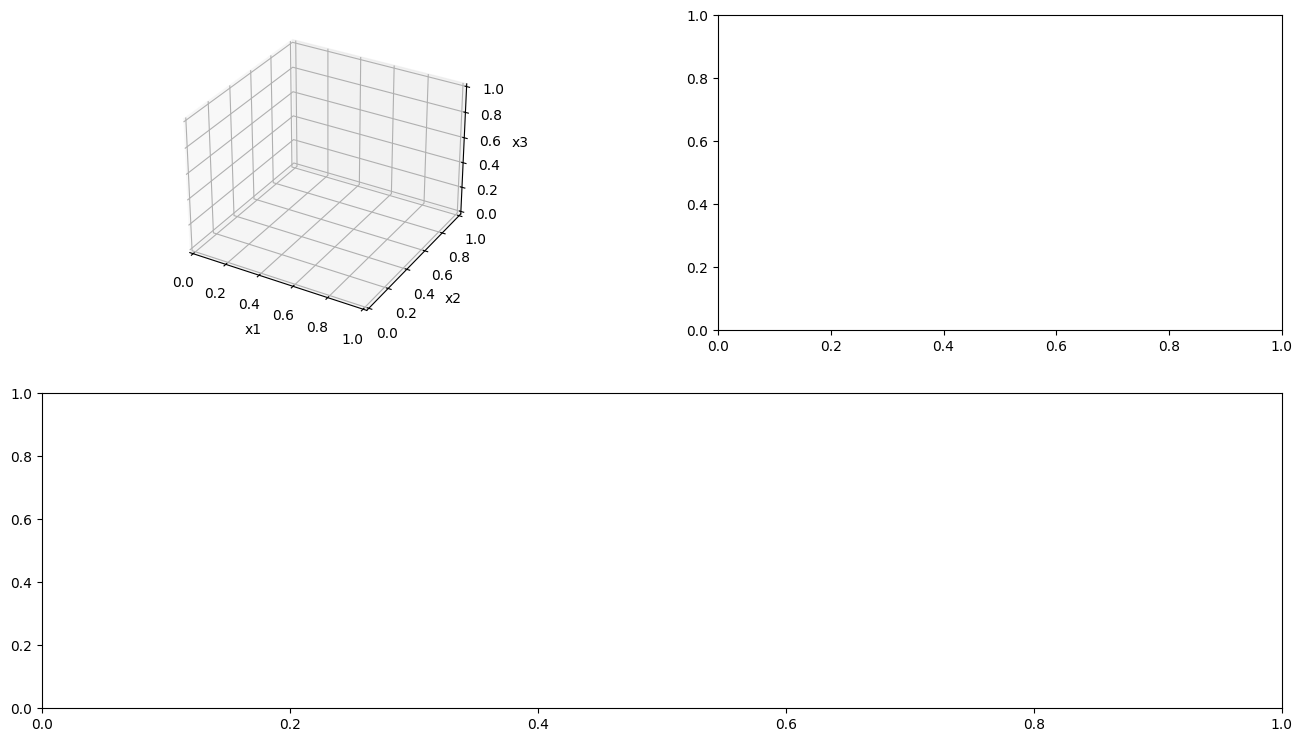

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import cm
import matplotlib.gridspec as gridspec
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

class AdvancedGradientDescentVisualizer:
    def __init__(self, objective_func, gradient_func, start_point, 
                 bounds=None, learning_rate=0.1, num_iterations=50):
        """
        Inicialización del visualizador avanzado de gradiente descendente
        
        :param objective_func: Función objetivo a minimizar
        :param gradient_func: Función para calcular el gradiente
        :param start_point: Punto inicial de optimización (array-like)
        :param bounds: Lista de tuplas con límites (min, max) para cada variable
        :param learning_rate: Tasa de aprendizaje
        :param num_iterations: Número de iteraciones
        """
        self.objective_func = objective_func
        self.gradient_func = gradient_func
        self.start_point = np.array(start_point)
        self.n_dims = len(start_point)
        self.bounds = bounds if bounds else [(-10, 10)] * self.n_dims
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        
        self.run_optimization()
    
    def run_optimization(self):
        """
        Ejecuta el proceso de gradiente descendente y almacena resultados
        """
        point = self.start_point.copy()
        self.trajectory = [point.copy()]
        self.objective_values = [self.objective_func(*point)]
        self.gradients = [self.gradient_func(point)]
        
        for _ in range(self.num_iterations):
            grad = self.gradient_func(point)
            point = point - self.learning_rate * grad
            
            # Aplicar restricciones de límites
            point = np.clip(point, 
                          [b[0] for b in self.bounds], 
                          [b[1] for b in self.bounds])
            
            self.trajectory.append(point.copy())
            self.objective_values.append(self.objective_func(*point))
            self.gradients.append(grad)
        
        self.trajectory = np.array(self.trajectory)
        self.objective_values = np.array(self.objective_values)
        self.gradients = np.array(self.gradients)

    def get_optimization_results(self):
        """
        Devuelve una tabla con los resultados de la optimización
        """
        results = {'Iteration': range(len(self.trajectory))}
        
        # Agregar columnas para cada variable x
        for i in range(self.n_dims):
            results[f'x{i+1}'] = self.trajectory[:, i]
        
        # Agregar columna para el valor de la función objetivo
        results['f(x)'] = self.objective_values
        
        return pd.DataFrame(results)

    def plot_objective_landscape(self, resolution=100):
        """
        Grafica el paisaje de la función objetivo y el mínimo global encontrado
        """
        if self.n_dims == 1:
            self._plot_1d_landscape(resolution)
        elif self.n_dims == 2:
            self._plot_2d_landscape(resolution)
        else:
            print("La visualización del paisaje solo está disponible para 1 o 2 dimensiones")

    def _plot_1d_landscape(self, resolution):
        """
        Grafica el paisaje para funciones de una variable
        """
        x = np.linspace(self.bounds[0][0], self.bounds[0][1], resolution)
        y = np.array([self.objective_func(xi) for xi in x])
        
        plt.figure(figsize=(10, 6))
        plt.plot(x, y, 'b-', label='Función objetivo')
        plt.plot(self.trajectory[:, 0], self.objective_values, 'r.-', 
                label='Trayectoria de optimización')
        plt.scatter(self.trajectory[-1, 0], self.objective_values[-1], 
                   color='g', s=100, label='Mínimo encontrado')
        
        plt.xlabel('x1')
        plt.ylabel('f(x)')
        plt.title('Paisaje de la Función Objetivo')
        plt.legend()
        plt.grid(True)
        plt.show()

    def _plot_2d_landscape(self, resolution):
        """
        Grafica el paisaje para funciones de dos variables
        """
        x1 = np.linspace(self.bounds[0][0], self.bounds[0][1], resolution)
        x2 = np.linspace(self.bounds[1][0], self.bounds[1][1], resolution)
        X1, X2 = np.meshgrid(x1, x2)
        
        Z = np.array([[self.objective_func(i, j) 
                      for i, j in zip(x_row, y_row)] 
                     for x_row, y_row in zip(X1, X2)])
        
        fig = plt.figure(figsize=(15, 5))
        
        # Gráfico de contorno
        ax1 = fig.add_subplot(121)
        contour = ax1.contour(X1, X2, Z, levels=20)
        ax1.clabel(contour, inline=True, fontsize=8)
        ax1.plot(self.trajectory[:, 0], self.trajectory[:, 1], 'r.-', 
                label='Trayectoria')
        ax1.scatter(self.trajectory[-1, 0], self.trajectory[-1, 1], 
                   color='g', s=100, label='Mínimo')
        ax1.set_xlabel('x1')
        ax1.set_ylabel('x2')
        ax1.set_title('Contorno de la Función Objetivo')
        ax1.legend()
        
        # Superficie 3D
        ax2 = fig.add_subplot(122, projection='3d')
        surf = ax2.plot_surface(X1, X2, Z, cmap=cm.coolwarm, alpha=0.8)
        ax2.plot(self.trajectory[:, 0], self.trajectory[:, 1], 
                self.objective_values, 'r.-', label='Trayectoria')
        ax2.scatter(self.trajectory[-1, 0], self.trajectory[-1, 1],
                   self.objective_values[-1], color='g', s=100, label='Mínimo')
        ax2.set_xlabel('x1')
        ax2.set_ylabel('x2')
        ax2.set_zlabel('f(x)')
        ax2.set_title('Superficie de la Función Objetivo')
        
        plt.tight_layout()
        plt.show()

    def create_animated_visualization(self):
        """
        Crea visualización animada adaptada al número de dimensiones
        """
        if self.n_dims <= 3:
            return self._create_animated_visualization_3d()
        else:
            return self._create_animated_visualization_nd()

    def _create_animated_visualization_3d(self):
        """
        Visualización animada para 2 o 3 dimensiones
        """
        fig = plt.figure(figsize=(16, 9))
        gs = fig.add_gridspec(2, 2)
        
        # Configurar subplots
        ax_traj = fig.add_subplot(gs[0, 0], projection='3d')
        ax_obj = fig.add_subplot(gs[0, 1])
        ax_coord = fig.add_subplot(gs[1, :])
        
        # Configurar límites y etiquetas
        ax_traj.set_xlabel('x1')
        ax_traj.set_ylabel('x2')
        if self.n_dims > 2:
            ax_traj.set_zlabel('x3')
        
        # ... (resto del código de animación similar al anterior)
        # Se adapta según el número de dimensiones
        
        return anim

    def _create_animated_visualization_nd(self):
        """
        Visualización animada para más de 3 dimensiones
        """
        # Similar al código anterior pero usando solo las primeras 3 dimensiones
        # para la visualización 3D
        pass

# Ejemplo de uso:
def ejemplo_funcion_objetivo(x1, x2, x3):
    """
    Ejemplo de función objetivo de 3 variables
    """
    return x1**2 + x2**2 + x3**2 + x1*x2 - x2*x3

def ejemplo_gradiente(point):
    """
    Gradiente de la función objetivo de ejemplo
    """
    x1, x2, x3 = point
    return np.array([
        2*x1 + x2,      # ∂f/∂x1
        2*x2 + x1 - x3, # ∂f/∂x2
        2*x3 - x2       # ∂f/∂x3
    ])

# Crear instancia del visualizador
visualizer = AdvancedGradientDescentVisualizer(
    objective_func=ejemplo_funcion_objetivo,
    gradient_func=ejemplo_gradiente,
    start_point=[3, 2, 1],
    bounds=[(-5, 5), (-5, 5), (-5, 5)],
    learning_rate=0.1,
    num_iterations=50
)

# Obtener tabla de resultados
results_df = visualizer.get_optimization_results()
print("Resultados de la optimización:")
print(results_df)

# Crear animación
anim = visualizer.create_animated_visualization()
anim.save('gradient_descent_3d.gif', writer='pillow')

plt.close('all')

# Optimización de particulas

In [34]:
import numpy as np
import pandas as pd
from typing import Callable
import matplotlib.pyplot as plt
from time import time

class ParticleSwarmOptimizer:
    def __init__(
        self,
        objective_function: Callable,
        dimensions: int,
        bounds: list,
        n_particles: int = 30,
        max_iter: int = 100,
        w_max: float = 0.9,  # Modificado: peso de inercia máximo
        w_min: float = 0.4,  # Modificado: peso de inercia mínimo
        c1: float = 2.0,
        c2: float = 2.0
    ):
        self.objective_function = objective_function
        self.dimensions = dimensions
        self.bounds = np.array(bounds)
        self.n_particles = n_particles
        self.max_iter = max_iter
        
        # Modificado: parámetros de peso de inercia dinámico
        self.w_max = w_max
        self.w_min = w_min
        self.w = w_max
        
        self.c1 = c1
        self.c2 = c2
        
        # Nuevo: calcular factor de constricción
        phi = c1 + c2
        self.chi = 2 / abs(2 - phi - np.sqrt(phi * phi - 4 * phi))
        
        # Nuevo: calcular velocidad máxima (10% del espacio de búsqueda)
        self.v_max = 0.1 * (self.bounds[:, 1] - self.bounds[:, 0])

        # Inicializar partículas y velocidades
        self.positions = np.random.uniform(
            self.bounds[:, 0],
            self.bounds[:, 1],
            size=(n_particles, dimensions)
        )

        self.velocities = np.zeros((n_particles, dimensions))

        # Evaluar posiciones iniciales
        self.scores = np.array([self.objective_function(p) for p in self.positions])

        # Mejor posición personal y global
        self.p_best = self.positions.copy()
        self.p_best_scores = self.scores.copy()
        self.g_best_idx = np.argmin(self.p_best_scores)
        self.g_best = self.p_best[self.g_best_idx].copy()
        self.g_best_score = self.p_best_scores[self.g_best_idx]

        self.history = []

    def optimize(self):
        start_time = time()

        for iteration in range(self.max_iter):
            # Actualizar peso de inercia dinámicamente
            self.w = self.w_max - (self.w_max - self.w_min) * (iteration / self.max_iter)
            
            # Actualizar velocidades con factor de constricción
            r1, r2 = np.random.rand(2)
            velocity_update = (self.w * self.velocities +
                             self.c1 * r1 * (self.p_best - self.positions) +
                             self.c2 * r2 * (self.g_best - self.positions))
            
            # Aplicar factor de constricción y límite de velocidad
            self.velocities = self.chi * velocity_update
            
            # Limitar velocidades
            self.velocities = np.clip(
                self.velocities,
                -self.v_max,
                self.v_max
            )

            # Actualizar posiciones
            self.positions += self.velocities

            # Mantener partículas dentro de los límites
            self.positions = np.clip(
                self.positions,
                self.bounds[:, 0],
                self.bounds[:, 1]
            )

            # El resto del código permanece igual
            self.scores = np.array([self.objective_function(p) for p in self.positions])

            improved_mask = self.scores < self.p_best_scores
            self.p_best[improved_mask] = self.positions[improved_mask]
            self.p_best_scores[improved_mask] = self.scores[improved_mask]

            min_score_idx = np.argmin(self.p_best_scores)
            if self.p_best_scores[min_score_idx] < self.g_best_score:
                self.g_best = self.p_best[min_score_idx].copy()
                self.g_best_score = self.p_best_scores[min_score_idx]

            for particle_idx in range(self.n_particles):
                history_entry = {
                    'iteration': iteration,
                    'particle': particle_idx,
                    'fitness': self.scores[particle_idx]
                }
                for dim in range(self.dimensions):
                    history_entry[f'x{dim+1}'] = self.positions[particle_idx, dim]

                self.history.append(history_entry)

        end_time = time()

        history_df = pd.DataFrame(self.history)

        metrics = {
            'best_score': self.g_best_score,
            'best_position': self.g_best,
            'execution_time': end_time - start_time,
            'final_iteration': self.max_iter,
            'n_particles': self.n_particles,
            'dimensions': self.dimensions,
            'convergence_score': history_df.groupby('iteration')['fitness'].min().iloc[-1]
        }

        return history_df, metrics


Resultados de la optimización:
Mejor valor encontrado: 0.000000
Mejor posición: x1=1.000053, x2=1.000105
Tiempo de ejecución: 0.06 segundos

Primeras filas del historial:
   iteration  particle       fitness        x1        x2
0          0         0   1055.248706 -0.807700  3.895805
1          0         1  26480.058012  3.571351 -3.516113
2          0         2     17.845188  0.549723 -0.117834
3          0         3   2543.916531  2.847147  3.065905
4          0         4      7.456260  1.328177  1.492973


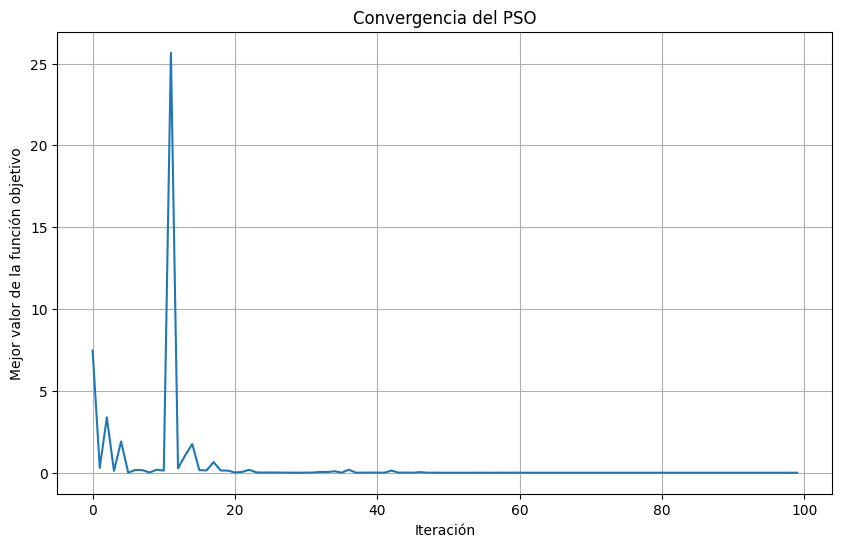

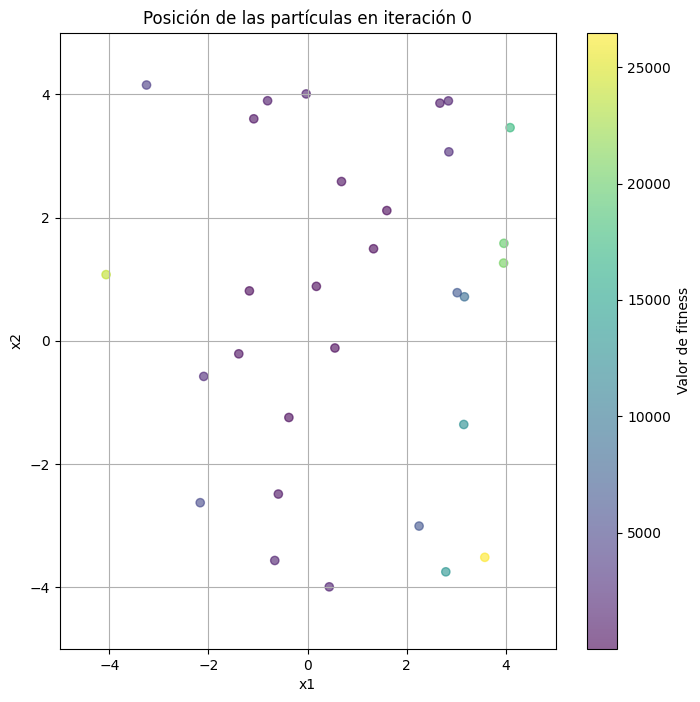

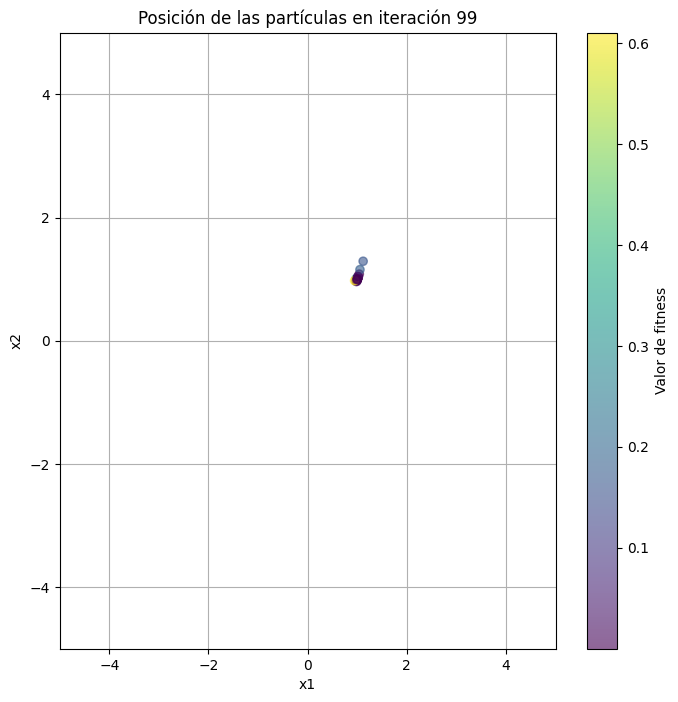

In [ ]:
dimensions = 2
bounds = [(-5, 5)] * dimensions  # Límites iguales para todas las dimensiones

pso = ParticleSwarmOptimizer(
    objective_function=rosenbrock,
    dimensions=dimensions,
    bounds=bounds,
    n_particles=30,
    max_iter=100
)

history_df, metrics = pso.optimize()

# Imprimir resultados
print("\nResultados de la optimización:")
print(f"Mejor valor encontrado: {metrics['best_score']:.6f}")
print(f"Mejor posición: {', '.join([f'x{i+1}={x:.6f}' for i, x in enumerate(metrics['best_position'])])}")
print(f"Tiempo de ejecución: {metrics['execution_time']:.2f} segundos")

# Mostrar las primeras filas del DataFrame
print("\nPrimeras filas del historial:")
print(history_df.head())


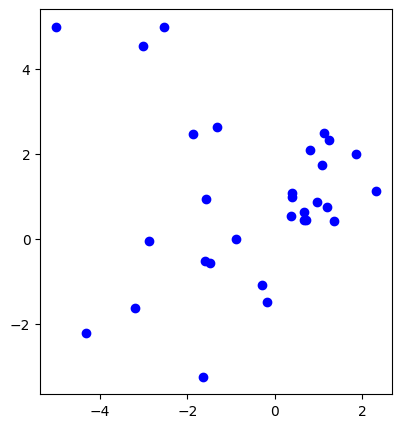

In [28]:
history_df1= history_df[history_df['iteration'] == 3]
plt.figure(figsize=(10, 5))  # Ajustar el tamaño de la figura

# Primera gráfica
plt.subplot(1, 2, 1)  # (filas, columnas, índice)
plt.scatter(history_df1['x1'], history_df1['x2'], color='blue')



In [35]:
functions = [
    ("Rosenbrock", rosenbrock, (-2.048, 2.048)),
    ("Rastrigin", rastrigin, (-5.12, 5.12)),
    ("Schwefel", schwefel, (-500, 500)),
    ("Griewank", griewank, (-600, 600)),
    ("Goldstein_Price", goldstein_price, (-2, 2)),
    ("Camel_Six_Humps", camel_six_humps, (-2, 2))
]

for name, func, bounds in functions:
    print(f"Processing {name} function...")
    history_df, metrics = ParticleSwarmOptimizer(
        objective_function= func,
        dimensions= 2 ,
        bounds=[bounds]*2,
        n_particles=30,
        max_iter=20).optimize()
    populations = [
    np.array(group[['x1', 'x2']].values.tolist()) 
    for _, group in history_df.groupby('iteration')]
    create_population_animation(
        func=func,
        populations=populations,
        bounds=bounds,
        output_filename=f'{name}_particulas_animation.gif'
    )

Processing Rosenbrock function...
Animation saved as Rosenbrock_particulas_animation.gif
Processing Rastrigin function...
Animation saved as Rastrigin_particulas_animation.gif
Processing Schwefel function...
Animation saved as Schwefel_particulas_animation.gif
Processing Griewank function...
Animation saved as Griewank_particulas_animation.gif
Processing Goldstein_Price function...
Animation saved as Goldstein_Price_particulas_animation.gif
Processing Camel_Six_Humps function...
Animation saved as Camel_Six_Humps_particulas_animation.gif


# Optimización diferencial

In [31]:
class DifferentialEvolution:
    def __init__(self, func, bounds, dimension=2, population_size=50, F=0.8, CR=0.7, max_iter=100):
        """
        Inicializa el algoritmo de Evolución Diferencial
        
        Parameters:
        - func: Función objetivo a minimizar
        - bounds: Límites de las variables [(x1_min, x1_max), ..., (xn_min, xn_max)]
        - dimension: Número de dimensiones del problema
        - population_size: Número de individuos en la población
        - F: Factor de mutación (escala de diferencia)
        - CR: Probabilidad de cruce (crossover)
        - max_iter: Número máximo de iteraciones
        """
        self.func = func
        # Asegura que bounds tenga la misma longitud que la dimensión
        self.bounds = bounds if len(bounds) == dimension else bounds * dimension
        self.dimension = dimension
        self.population_size = population_size
        self.F = F  # Factor de mutación
        self.CR = CR  # Probabilidad de cruce
        self.max_iter = max_iter

    def initialize_population(self):
        """
        Inicializa la población de manera aleatoria dentro de los límites especificados
        
        Returns:
        - Matriz numpy con población inicial
        """
        # Crea una matriz de ceros con el tamaño de la población
        population = np.zeros((self.population_size, self.dimension))
        
        # Genera valores aleatorios para cada dimensión
        for i in range(self.dimension):
            population[:, i] = np.random.uniform(
                self.bounds[i][0],  # Límite inferior
                self.bounds[i][1],  # Límite superior
                size=self.population_size  # Número de individuos
            )
        return population

    def mutation(self, population):
        """
        Aplica la estrategia de mutación DE/rand/1
        
        Parameters:
        - population: Población actual
        
        Returns:
        - Población mutada
        """
        # Crea una matriz para almacenar la población mutada
        mutation_pop = np.zeros_like(population)

        for i in range(self.population_size):
            # Selecciona tres individuos aleatorios diferentes
            candidates = list(range(self.population_size))
            candidates.remove(i)
            r1, r2, r3 = np.random.choice(candidates, 3, replace=False)

            # Genera un nuevo vector mediante mutación
            mutation_pop[i] = population[r1] + self.F * (population[r2] - population[r3])

            # Asegura que los valores estén dentro de los límites
            for j in range(self.dimension):
                mutation_pop[i, j] = np.clip(
                    mutation_pop[i, j],
                    self.bounds[j][0],
                    self.bounds[j][1]
                )

        return mutation_pop

    def crossover(self, population, mutation_pop):
        """
        Aplica el cruce binomial (crossover)
        
        Parameters:
        - population: Población actual
        - mutation_pop: Población mutada
        
        Returns:
        - Población de prueba tras el cruce
        """
        # Crea una matriz para almacenar la población de prueba
        trial_pop = np.zeros_like(population)

        for i in range(self.population_size):
            # Genera puntos de cruce basados en CR
            cross_points = np.random.rand(self.dimension) <= self.CR
            # Asegura al menos un punto de cruce
            cross_points[np.random.randint(0, self.dimension)] = True
            
            # Genera vector de prueba
            trial_pop[i] = np.where(cross_points, mutation_pop[i], population[i])

        return trial_pop

    def selection(self, population, trial_pop):
        """
        Selección de los mejores individuos
        
        Parameters:
        - population: Población actual
        - trial_pop: Población de prueba
        
        Returns:
        - Nueva población y sus valores de aptitud
        """
        # Calcula la aptitud de la población actual y de prueba
        pop_fitness = np.array([self.func(ind) for ind in population])
        trial_fitness = np.array([self.func(ind) for ind in trial_pop])

        # Identifica qué individuos de prueba son mejores
        better_indices = trial_fitness < pop_fitness
        population[better_indices] = trial_pop[better_indices]

        return population, np.minimum(pop_fitness, trial_fitness)

    def optimize(self):
        """
        Ejecuta el proceso completo de optimización
        
        Returns:
        - DataFrame con historial detallado
        - Métricas de rendimiento
        - Mejor solución encontrada
        """
        # Registra el tiempo de inicio
        start_time = time()

        # Inicializa la población
        population = self.initialize_population()
        best_fitness = float('inf')
        best_solution = None

        # Lista para almacenar el historial detallado
        full_history = []

        # Ciclo principal de optimización
        for generation in range(self.max_iter):
            # Pasos del algoritmo de Evolución Diferencial
            mutation_pop = self.mutation(population)
            trial_pop = self.crossover(population, mutation_pop)
            population, fitness = self.selection(population, trial_pop)

            # Registra información de cada partícula en la generación
            for particle in range(self.population_size):
                full_history.append({
                    'generation': generation,
                    'particle': particle,
                    'fitness': fitness[particle],
                    'x1': population[particle, 0],
                    'x2': population[particle, 1]
                })

            # Actualiza la mejor solución
            gen_best_idx = np.argmin(fitness)
            gen_best_fitness = fitness[gen_best_idx]

            if gen_best_fitness < best_fitness:
                best_fitness = gen_best_fitness
                best_solution = population[gen_best_idx].copy()

        # Calcula tiempo total de optimización
        end_time = time()
        optimization_time = end_time - start_time

        # Crea DataFrame con el historial detallado
        history_df = pd.DataFrame(full_history)

        # Calcula métricas de rendimiento
        performance_metrics = {
            'mejor_fitness': best_fitness,
            'mejor_solucion': best_solution,
            'tiempo_total': optimization_time,
            'generaciones': self.max_iter,
            'evaluaciones_funcion': self.max_iter * self.population_size,
            'tiempo_promedio_por_generacion': optimization_time / self.max_iter
        }

        return history_df, performance_metrics, best_solution

In [33]:
functions = [
    ("Rosenbrock", rosenbrock, (-2.048, 2.048)),
    ("Rastrigin", rastrigin, (-5.12, 5.12)),
    ("Schwefel", schwefel, (-500, 500)),
    ("Griewank", griewank, (-600, 600)),
    ("Goldstein_Price", goldstein_price, (-2, 2)),
    ("Camel_Six_Humps", camel_six_humps, (-2, 2))
]

for name, func, bounds in functions:
    print(f"Processing {name} function...")
    history_df, metrics, best_solution  = DifferentialEvolution(
        func= func,
        dimension= 2 ,
        bounds=[bounds]*2,
        population_size=30,
        F=0.8,
        CR=0.7,
        max_iter=20).optimize()
    
    populations = [
    np.array(group[['x1', 'x2']].values.tolist()) 
    for _, group in history_df.groupby('generation')]
    create_population_animation(
        func=func,
        populations=populations,
        bounds=bounds,
        output_filename=f'{name}_diferential_evolution_animation.gif'
    )

Processing Rosenbrock function...
Animation saved as Rosenbrock_diferential_evolution_animation.gif
Processing Rastrigin function...
Animation saved as Rastrigin_diferential_evolution_animation.gif
Processing Schwefel function...
Animation saved as Schwefel_diferential_evolution_animation.gif
Processing Griewank function...
Animation saved as Griewank_diferential_evolution_animation.gif
Processing Goldstein_Price function...
Animation saved as Goldstein_Price_diferential_evolution_animation.gif
Processing Camel_Six_Humps function...
Animation saved as Camel_Six_Humps_diferential_evolution_animation.gif


# Rendimiento

In [ ]:
def optimize_performance_comparison(
    objective_function: Callable,
    dimensions_list: List[int],
    bounds_variations: List[Tuple[float, float]],
    n_runs: int = 10,
):

  results = []
  for dimensions in dimensions_list:
    for bounds_variation in bounds_variations:


      #optimizacion de particulas
      bounds = [bounds_variation] * dimensions
      run_times = []
      final_best_scores = []
      iterations_used = []

      for run in range(n_runs):
        pso = ParticleSwarmOptimizer(
            objective_function=rosenbrock,
            dimensions=dimensions,
            bounds=bounds,
            n_particles=30,
            max_iter=100
        )
        start_time = time()
        history_df, metrics = pso.optimize()
        end_time = time()
        run_times.append(end_time - start_time)
        iterations = len(history_df['iteration'].unique())

        final_best_scores.append(metrics['best_score'])
        iterations_used.append(metrics['final_iteration'])

      # Calcular promedios
      results.append({
          'Optimizador': 'enjambre de particulas',
          'Dimensions': dimensions,
          'Bounds': str(bounds_variation),
          'Avg_Execution_Time': np.mean(run_times),
          'Std_Execution_Time': np.std(run_times),
          'Avg_Best_Score': np.mean(final_best_scores),
          'Std_Best_Score': np.std(final_best_scores),
          'Avg_Iterations': np.mean(iterations_used),
          'Std_Iterations': np.std(iterations_used)
      })

      #evolucion diferencial
      bounds = [bounds_variation] * dimensions
      run_times = []
      final_best_scores = []
      iterations_used = []

      for run in range(n_runs):
        de = DifferentialEvolution(
        func=rosenbrock,
        bounds=bounds,
        dimension=dimensions,
        population_size=50,
        F=0.8,
        CR=0.7,
        max_iter=100
        )
        start_time = time()
        history_df, performance, best_solution = de.optimize()
        end_time = time()
        run_times.append(end_time - start_time)
        iterations = len(history_df['generation'].unique())
        final_best_scores.append(performance['mejor_fitness'])
        iterations_used.append(performance['generaciones'])

      results.append({
          'Optimizador': 'evolucion diferencial',
          'Dimensions': dimensions,
          'Bounds': str(bounds_variation),
          'Avg_Execution_Time': np.mean(run_times),
          'Std_Execution_Time': np.std(run_times),
          'Avg_Best_Score': np.mean(final_best_scores),
          'Std_Best_Score': np.std(final_best_scores),
          'Avg_Iterations': np.mean(iterations_used),
          'Std_Iterations': np.std(iterations_used)
      })


  return pd.DataFrame(results)
